In [148]:
# Author: Joakim Eckerman 028731311
# Date: 09/29/2023
# Course: CECS 456 Machine Learning
# Assignment: Cross Entropy - Gradient Descent

# Description:
# This code loads a dataset, performs gradient descent optimization to minimize a cross-entropy loss function, and visualizes the optimization process.
# It plots the input data, generates a 3D surface plot of the loss function with respect to two weight parameters,
# and displays the optimization path in red, illustrating how the loss changes as the weight vector is updated.

\begin{align*}
g(w) &= -\frac{1}{P}\sum_{p=1}^{P} y_p \log(\sigma((\dot{x}_p \cdot w)^T)) + (1 - y_p) \log(1 - \sigma((\dot{x}_p \cdot w)^T)) \\
\\
\text{Step 1:} \quad & \nabla \left(-y_p \log(\sigma((\dot{x}_p \cdot w)^T))\right) = -y_p \frac{1}{\sigma((\dot{x}_p \cdot w)^T)} \cdot \nabla\left(\sigma((\dot{x}_p \cdot w)^T)\right) \\
\\
\text{Step 2:} \quad & \nabla\left(\sigma(z)\right) = \sigma(z)(1 - \sigma(z)) \\
\\
\text{Step 3:} \quad & \nabla \left(-y_p \log(\sigma((\dot{x}_p \cdot w)^T))\right) = -y_p \frac{1}{\sigma((\dot{x}_p \cdot w)^T)} \cdot \sigma((\dot{x}_p \cdot w)^T)(1 - \sigma((\dot{x}_p \cdot w)^T)) \cdot \nabla((\dot{x}_p \cdot w)^T) \\
\\
\text{Step 4:} \quad & \nabla((\dot{x}_p \cdot w)^T) = \dot{x}_p \\
\\
\text{Step 5:} \quad & \nabla \left(-y_p \log(\sigma((\dot{x}_p \cdot w)^T))\right) = -y_p(1 - \sigma((\dot{x}_p \cdot w)^T))\dot{x}_p \\
\\
\text{Step 6:} \quad & \nabla \left((1-y_p) \log(1-\sigma((\dot{x}_p \cdot w)^T))\right) = (1-y_p)(-\sigma((\dot{x}_p \cdot w)^T))\dot{x}_p \\
\\
\text{Step 7:} \quad & \nabla g(w) = \frac{1}{P} \sum_{p=1}^{P} \left(-y_p(1 - \sigma((\dot{x}_p \cdot w)^T))\dot{x}_p + (1-y_p)(-\sigma((\dot{x}_p \cdot w)^T))\dot{x}_p\right) \\
\\
\text{Step 8:} \quad & \nabla g(w) = -\frac{1}{P} \sum_{p=1}^{P} (y_p - \sigma((\dot{x}_p \cdot w)^T)) \cdot \dot{x}_p
\end{align*}

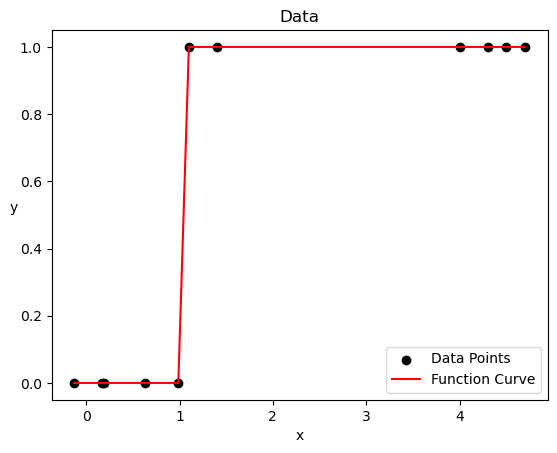

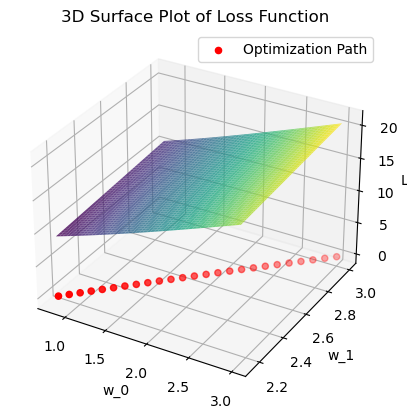

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = np.loadtxt("2d_classification_data_v1_entropy.csv", delimiter=',')

x = np.ones((1,11))
            
x = np.vstack((x, data[0, :]))

# Create y as a row vector (1x11)
y = data[-1, :].reshape(-1, 1)

# Initialize w as a row vector (2x1)
w = np.array([[3], [3]], dtype=np.float32)

# Arrays to store values of w_0 and w_1 at each iteration
w_0_values = []
w_1_values = []

k = 25
# k = 2000

def sigmoid(t):
    return 1/(1 + np.exp(-t))

# Assuming x and w are reshaped to (11, 1) and (1, 2) respectively
def cross_entropy(w, x, y):
    # Compute the cross-entropy loss function
    loss = -np.sum(y * np.log(sigmoid(np.dot(x.T, w))) + (1 - y) * np.log(1 - sigmoid(np.dot(x.T, w))))
    return loss

def gradient_descent(w, x, y, lr):
    # Compute the gradient of the loss function
    gradient = np.dot(x, (sigmoid(np.dot(x.T, w)) - y)) / x.shape[0]

    # Update the weights using the gradient
    w -= lr * gradient

def minimize_cross_entropy_recursive(w, x, y, lr, max_iterations=k):
    # Check if the maximum number of iterations has been reached
    if max_iterations == 0:
        return w
    
    # Append the current values of w_0 and w_1 to the arrays
    w_0_values.append(w[0, 0])
    w_1_values.append(w[1, 0])

    # Compute the loss function
    loss = cross_entropy(w, x, y)

    # Update the weights using gradient descent
    gradient_descent(w, x, y, lr)

    # Recursively call the function to minimize the loss function for one fewer iteration
    return minimize_cross_entropy_recursive(w, x, y, lr, max_iterations - 1)

# Minimize the cross-entropy loss function using recursion
w = minimize_cross_entropy_recursive(w, x, y, lr=1/k, max_iterations=k)

plt.scatter(x[1, :], y, color='black', label='Data Points')
plt.plot(x[1, :], y, color='red', label='Function Curve')
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

# Create a grid of w_0 and w_1 values
w_0_range = np.linspace(min(w_0_values), max(w_0_values), 100)
w_1_range = np.linspace(min(w_1_values), max(w_1_values), 100)
W_0, W_1 = np.meshgrid(w_0_range, w_1_range)

# Compute the loss values for each combination of w_0 and w_1
loss_values = np.zeros_like(W_0)
for i in range(100):
    for j in range(100):
        loss_values[i, j] = cross_entropy(np.array([[W_0[i, j]], [W_1[i, j]]]), x, y)

# Create a 3D plot to visualize how w_0 and w_1 change through iterations
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W_0, W_1, loss_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('Loss')
ax.set_title('3D Surface Plot of Loss Function')
ax.scatter(w_0_values, w_1_values, np.zeros_like(w_0_values), color='red', marker='o', label='Optimization Path')
ax.legend()
plt.show()
